In [3]:
#import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models

In [4]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
y_train.shape

(60000,)

In [11]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [10]:
y_test.shape

(10000,)

In [12]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(y[index])

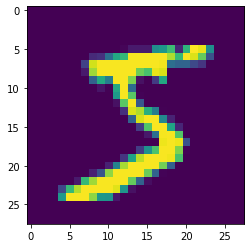

In [14]:
plt.imshow(X_train[0])

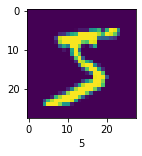

In [13]:
plot_sample(X_train, y_train, 0)

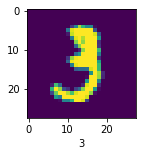

In [15]:
plot_sample(X_train, y_train, 10)

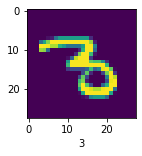

In [16]:
plot_sample(X_train, y_train, 30)

In [17]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [41]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))


In [42]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [43]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [45]:

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 71s 33ms/step - loss: 0.8974 - accuracy: 0.6896
Epoch 2/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.3240 - accuracy: 0.9012
Epoch 3/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2538 - accuracy: 0.9233
Epoch 4/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.1979 - accuracy: 0.9410
Epoch 5/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.1567 - accuracy: 0.9525
Epoch 6/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.1286 - accuracy: 0.9609
Epoch 7/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1101 - accuracy: 0.9664
Epoch 8/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0969 - accuracy: 0.9700
Epoch 9/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0886 - accuracy: 0.9726
Epoch 10/10
1875/1875 [==============================] - 59s 32m

In [46]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 7s 9ms/step - loss: 0.0746 - accuracy: 0.9765


[0.07463851571083069, 0.9764999747276306]

In [53]:
y_pred = cnn.predict(X_test)

In [54]:
y_classes = [np.argmax(element) for element in y_pred]


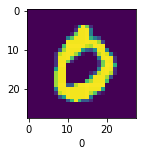

In [55]:
plot_sample(X_test, y_test,3)

In [56]:
y_classes=[np.argmax(element) for element in y_pred]

In [58]:
from sklearn.metrics import confusion_matrix,classification_report 

print(classification_report( y_test,y_classes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.98      0.98      1032
           3       0.99      0.97      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.96      0.97      1028
           8       0.94      0.99      0.96       974
           9       0.96      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

